# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; and
5. Create meaningful visualizations to analyze the data!
---

## Important Dates

- Homework release: Fri 2 Oct 2020
- **Homework due**: Fri 16 Oct 2020, 23:59
- Grade release: Fri 23 Oct 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the `data` folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in either comments or markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.



## Context

The coronavirus pandemic has led to the implementation of unprecedented non-pharmaceutical interventions ranging from case isolation to national lockdowns. These interventions, along with the disease itself, have created massive shifts in people’s lives. For instance, in mid-May 2020, more than one third of the global population was under lockdown, and millions have since lost their jobs or have moved to work-from-home arrangements.


Importantly, the disease has shifted people's [needs](https://en.wikipedia.org/wiki/Toilet_paper), [interests](https://en.wikipedia.org/wiki/TikTok), and [concerns](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Switzerland) across the globe.

In this homework, we will take a deep dive into Wikipedia data and try to uncover what changed with the pandemic. More specifically, we will be focusing on Wikipedia pageviews, that is, how many people read each article on Wikipedia each day.
A nice graphical user interface for playing with Wikipedia pageviews is available [here](https://pageviews.toolforge.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&range=latest-20&pages=Cat|Dog).
Also, the Wikimedia Foundation releases dump files with the number of pageviews per article across all Wikimedia websites, including Wikipedia in all its language editions [(amazing, right?)](https://dumps.wikimedia.org/other/pagecounts-ez/). 

#### But wait, what is a pageview?

> A pageview or page view, abbreviated in business to PV and occasionally called page impression, is a request to load a single HTML file (web page) of an Internet site. On the World Wide Web, a page request would result from a web surfer clicking on a link on another page pointing to the page in question. (Source: [Wikipedia article "Pageviews"](https://en.wikipedia.org/wiki/Pageview))

Pageviews in Wikipedia can tell us that people are looking for certain information online. Analyzing how the volume and the distribution of pageviews changed can tell us about how the behavior of Wikipedia readers has changed.

In this homework, you will take a deep dive into analyzing Wikipedia pageview logs and uncover shifts in interests associated with the current pandemic.

---

## The data

First, you need to download a **meraviglioso** dataset from the Italian Wikipedia that we prepared for you. The structure of the data is described next. 

**The dataset is available in the `data` directory pushed to the same GitHub repo as the homework**. Inside of the data directory, you will find three files:

### `articles.tsv.gz`

This is a tab-separated file containing daily pageviews for a subset of the articles from Italian Wikipedia. It is compressed! Each row corresponds to a different article, and each column (except the first) corresponds to the number of pageviews this article received on a given day. The example below shows the structure for two of the things [Kristina Gligorić](https://kristinagligoric.github.io/), one of your TAs, likes the most on her Pizza:

**Example:**
~~~
index       2018-01-01 00:00:00    2018-01-02 00:00:00 (...)
Formaggio   100                    101                 (...)
Ananas      12                     54                  (...)
(...)       (...)                  (...)
~~~


### `topics.jsonl.gz`

This is a classification of which topics an article belongs to, according to a model released by the Wikimedia Foundation (the classes are derived from this [taxonomy](https://www.mediawiki.org/wiki/ORES/Articletopic)). Importantly, this file was obtained from English Wikipedia, while the previous one contains articles from the Italian Wikipedia. This is important because article titles in the Italian Wikipedia are in Italian, while article titles in the English page are in English (duh!). In any case, each line contains a .json object with
the English name of the article (name);
1. the English name of the article (`name`);
2. a set of fields related to topics themselves. Each of these fields is set as either `True` (if the article belongs to this topic) or `False` (if it does not). Notice that the same article may belong to multiple topics. 

**Example:**
~~~
{"index": "Cheese", "Culture.Food and drink": True, "Culture.Literature": False (...)}
{"index": "Pineapple", "Culture.Food and drink": True, "Culture.Literature": False (...)}
(...)
~~~

 
### `mapping.pickle`

This is a `.pickle` file, that is, a serialized Python object. You can read about Python pickles  [here](https://wiki.python.org/moin/UsingPickle), 
but in short: the default Python library `pickle` allows you to save and load Python objects to and from disk. This is one object saved via the pickle library: a Python dictionary containing a mapping between the English names and the Italian names of Wikipedia articles:

**Example:**
~~~
{
    "Cheese": "Formaggio",
    "Ananas": "Pineapple"
    (...)
}
~~~
---


## _Step 1:_ Loading the data

---
### **Task 1**

Your first task is to load all these datasets into memory using pandas and pickle. 
**You should load the files compressed.**

Here, the files at hand are rather small, and you could easily uncompress  the files to disk and work with them as plain text. 
Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, this will often not be the case.

Then, working with compressed files is key so that you don't receive e-mail from your (often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your datasets. 
Another big advantage of compressing files is to simply read files faster. You will often find that reading compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading and writing to the disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

 
---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). Check the `error_bad_lines` parameter on `read_csv`.

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

#We load the data
with open('data/mapping.pickle', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
    
#We create a DataFrame for the mapping between Italian and English article names    
mapping = pd.DataFrame(pd.Series(content), columns= ['Italian_Name'])
mapping.index.name = 'English_Name'

#We reate a DataFrame for topics and articles
topics = pd.read_json('data/topics.jsonl.gz', lines=True)
articles = pd.read_csv('data/articles.tsv.gz', sep='\t' , error_bad_lines=False)

#We set indexes of articles and topics
articles = articles.set_index('index')
topics = topics.set_index('index')

b'Skipping line 7: expected 944 fields, saw 945\n'


In [2]:
articles.head()

,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,2018-01-10 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
index,,,,,,,,,,,,,,,,,,,,,
Khulna,0,2,1,0,0,2,0,2,0,1,...,0,1,1,0,1,1,0,2,1,2
Karim_Ansarifard,1,5,1,1,1,3,6,4,5,6,...,2,2,0,1,2,0,1,0,0,0
Poldhu,0,0,1,1,0,1,0,2,2,3,...,0,2,2,0,0,0,2,1,2,1
Alice_(The_Sisters_of_Mercy),0,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Palmyra,1,4,0,0,0,2,11,2,0,0,...,0,0,1,0,0,0,1,0,0,0


In [3]:
topics.head()

,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,Geography.Regions.Americas.North America,...,STEM.Mathematics,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia
index,,,,,,,,,,,,,,,,,,,,,
Chinese_food_therapy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Battle_of_Naissus,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Battle_of_Stoke_Field,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
Smooth_newt,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Vicente_Aleixandre,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
mapping.head()

,Italian_Name
English_Name,
Chinese_food_therapy,Dietetica_cinese
Battle_of_Naissus,Battaglia_di_Naisso
Battle_of_Stoke_Field,Battaglia_di_Stoke_Field
Smooth_newt,Lissotriton_vulgaris
Vicente_Aleixandre,Vicente_Aleixandre


## _Step 2:_ Filtering the data

---
### **Task 2**

Oh no! Something seems wrong with your dataframe!
It seems that some of the lines in the `articles.tsv.gz` are weird! 
They have titles in the format `"Discussione:name_of_the_page"`.

Unsure of what they mean, you ask about them in the [Wiki-research mailing list](https://lists.wikimedia.org/mailman/listinfo/wiki-research-l).
Twenty minutes later a kind internet stranger comes with an answer! 
She tells you that these are talk pages, where people discussing what should and should not be in the article (in fact it can be pretty funny to read, eg, [you can read Italians debating about pizza](https://it.wikipedia.org/wiki/Discussione:Pizza))

After understanding what they are, your task is now to filter these lines using `pandas`! After all, we are interested in pageviews going towards articles! Not discussion pages!

---

**Hint**: There is one of them in the position \#180 of the dataframe, if you want to check it!

In [5]:
#We drop all articles which names contain 'Discussione:'
articles = articles.drop(articles.loc[articles.index.str.startswith("Discussione:")].index)

#We check the 180th index
articles.iloc[180]

2018-01-01 00:00:00    0
2018-01-02 00:00:00    0
2018-01-03 00:00:00    0
2018-01-04 00:00:00    0
2018-01-05 00:00:00    0
                      ..
2020-07-27 00:00:00    0
2020-07-28 00:00:00    0
2020-07-29 00:00:00    0
2020-07-30 00:00:00    0
2020-07-31 00:00:00    1
Name: Allsvenskan_1997, Length: 943, dtype: int64

## *Step 3*: Understanding the data

---
### **Task 3.1**
Data cleaning is hard huh? But now that this headache is behind us we can go on to explore our data.

Let's begin with some basic stats. It is always important to do this as a sanity check.

You should:

1. Start by calculating how many topics and articles there are. Also, while you are at it, print the names of the topics to get a grasp of what they are about. 
2. Calculate the average daily number of pageviews in the dataset.
3. **Discuss:** As previously mentioned, your data is a sample of _some_ (and not all) Wikipedia articles! Estimate (roughly) what percentage of Italian Wikipedia articles are in your dataset comparing your daily average pageview numbers with the official statistics (which can be found [here](https://pageviews.toolforge.org/siteviews/?platform=desktop&source=pageviews&agent=user&start=2020-01-01&end=2020-09-21&sites=it.wikipedia.org)). Notice that we are focusing on the desktop version of Wikipedia.

---
**Hint**: topics are in the columns of the topic file!

### ~ 3.1.1

In [6]:
all_topics = topics.columns

#Check that every index(article) is unique. If yes, print the number of different articles. 
if(articles.index.is_unique):
    print("There are {} different articles.\n".format(len(articles)))
else :
    print("Warning ! some articles are duplicates")
    
#Check that every column(topic) is unique. If yes, print the number of different topics    
if(topics.columns.is_unique):
    print("There are {} different topics.\n".format(len(all_topics)))
else :
    print("Warning ! some topics are duplicates")
    
#Print all the different topics.
print("The different topics are:")

for i,topic in enumerate(all_topics):
    print("{}) {}".format(i+1, topic))

There are 55791 different articles.

There are 64 different topics.

The different topics are:
1) Geography.Regions.Asia.Central Asia
2) Geography.Regions.Europe.Eastern Europe
3) History and Society.Military and warfare
4) Culture.Media.Television
5) History and Society.Education
6) Culture.Media.Books
7) Geography.Regions.Africa.Africa*
8) Culture.Visual arts.Architecture
9) Culture.Biography.Women
10) Geography.Regions.Americas.North America
11) STEM.STEM*
12) Culture.Performing arts
13) Culture.Literature
14) History and Society.Politics and government
15) Geography.Regions.Africa.Northern Africa
16) STEM.Earth and environment
17) Geography.Regions.Africa.Central Africa
18) STEM.Medicine & Health
19) STEM.Libraries & Information
20) Geography.Regions.Europe.Europe*
21) Geography.Regions.Europe.Western Europe
22) Culture.Media.Radio
23) STEM.Space
24) Culture.Visual arts.Comics and Anime
25) STEM.Technology
26) Culture.Internet culture
27) Culture.Media.Software
28) Geography.Region

### ~ 3.1.2

In [7]:
#Daily pageviews of all articles: we sum over pageviews of all articles for each day.
daily_pageviews = pd.DataFrame(articles.agg('sum'), columns=['Sum_of_Pageviews'])

#We then take the mean over all days
average_daily_pageviews = daily_pageviews.agg('mean' , axis=0)

daily_pageviews.head()

,Sum_of_Pageviews
2018-01-01 00:00:00,220569
2018-01-02 00:00:00,362233
2018-01-03 00:00:00,369115
2018-01-04 00:00:00,378649
2018-01-05 00:00:00,363122


### ~ 3.1.3

In [8]:
#The daily average of italien wikipedia articles pageviews 
daily_average_italian_wiki_pageviews = 5731987

print("The articles contained in the datased have an average of {} page views per day."\
      .format(average_daily_pageviews[0]))
print("It reprensents {}% of the whole italian wikipedia trafic of our dataset".format(100*average_daily_pageviews[0]\
                                                                        /daily_average_italian_wiki_pageviews))


The articles contained in the datased have an average of 324267.67126193 page views per day.
It reprensents 5.657159921366361% of the whole italian wikipedia trafic of our dataset



### **Task 3.2**

Now that we have a better understanding of the data, let's look at some articles to get a feeling of what is happening. 

Your task is to:

1. Find all articles whose names contain the sequence of characters `"virus"` (case insensitive) and that received least 7,000 pageviews across the entire period (no point in zooming on very insignificant articles);
2. Find a way to nicely visualize __each__ one of the time-series (in a single plot, which may have multiple panels; in the lecture, Bob referred to these as “small multiples); Your visualization should allow one to see overall trends across each of the different articles and depict the overall trends, with the least noise possible. Additionally, highlight two specific dates in your plot: 31 January ([first case reported in Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#First_confirmed_cases)) and 21 February ([when multiple cases were confirmed in northern Italy](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Italy#Clusters_in_northern_Italy)).
4. **Discuss**: What did you observe? Did all the articles behave similarly?

---

**Hint**: The column dates are currently strings which are not very plot friendly. You can turn them into datetime objects using: 

~~~python
your_dataframe_name.columns = pd.to_datetime(your_dataframe_name.columns)
~~~

Notice that this only works if you have only date-related columns. Fortunately, if you get rid of the `index` column by making it a real pandas index, things should work just fine.

**Hint**: Choose your axes wisely!



### ~ 3.2.1

We retrieve the articles concerning 'virus' using .contains and the select the most seen ones using .query

In [9]:
#We create DataFrame with all articles containing 'virus' (case insensitive)
Pageviews_virus = articles[articles.index.str.contains('virus' , case=False)]
#We select articles that received at least 7000 pageviews across the entire period
Pageviews_virus_7000 = pd.DataFrame(Pageviews_virus.sum(axis=1), columns = ['Views']).query('Views >=7000')
Pageviews_virus = Pageviews_virus.loc[Pageviews_virus_7000.index]
Pageviews_virus_7000.head(10)

,Views
index,
Virus_della_leucemia_felina,13861
Malattia_da_virus_Ebola,48530
Influenzavirus_A_sottotipo_H1N1,75362
Rhinovirus,15685
Virus_(informatica),78334
Herpesvirus_umano_3,8566
Antivirus,42536
Virus_respiratorio_sinciziale_umano,10103


### ~ 3.2.2

We convert columns type to datetime type

In [10]:

Pageviews_virus.columns = pd.to_datetime(Pageviews_virus.columns)
Pageviews_virus.index.name = 'Virus_Article'
Pageviews_virus.head()

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
Virus_Article,,,,,,,,,,,,,,,,,,,,,
Virus_della_leucemia_felina,11,27,20,28,24,9,13,36,30,34,...,13,12,13,9,6,10,11,7,7,8
Malattia_da_virus_Ebola,3,21,13,23,28,5,11,11,17,18,...,142,30,25,126,30,27,147,25,39,146
Influenzavirus_A_sottotipo_H1N1,20,23,49,52,46,108,271,143,75,60,...,37,27,30,70,36,39,39,35,35,44
Rhinovirus,6,9,12,22,13,12,21,18,19,15,...,8,10,10,13,6,14,10,8,9,14
Virus_(informatica),26,70,74,66,86,44,67,94,107,168,...,21,38,21,18,30,24,33,28,22,17


In [11]:
#We transpose our DataFrame
Pageviews_virus = Pageviews_virus.T
Pageviews_virus

Virus_Article,Virus_della_leucemia_felina,Malattia_da_virus_Ebola,Influenzavirus_A_sottotipo_H1N1,Rhinovirus,Virus_(informatica),Herpesvirus_umano_3,Antivirus,Virus_respiratorio_sinciziale_umano
2018-01-01,11,3,20,6,26,2,19,6
2018-01-02,27,21,23,9,70,5,31,11
2018-01-03,20,13,49,12,74,5,26,18
2018-01-04,28,23,52,22,66,14,27,18
2018-01-05,24,28,46,13,86,6,42,15
...,...,...,...,...,...,...,...,...
2020-07-27,10,27,39,14,24,8,19,9
2020-07-28,11,147,39,10,33,13,23,4
2020-07-29,7,25,35,8,28,5,23,12
2020-07-30,7,39,35,9,22,9,22,5


##### We decided to plot the pageviews of each article <ins>separately</ins>  between 2020-01-01 and 2020-04-10 to see what happened on 2020-01-31 and 2020-02-22.
##### We then plot each one of the time-series in a <ins>single plot</ins> (bellow).

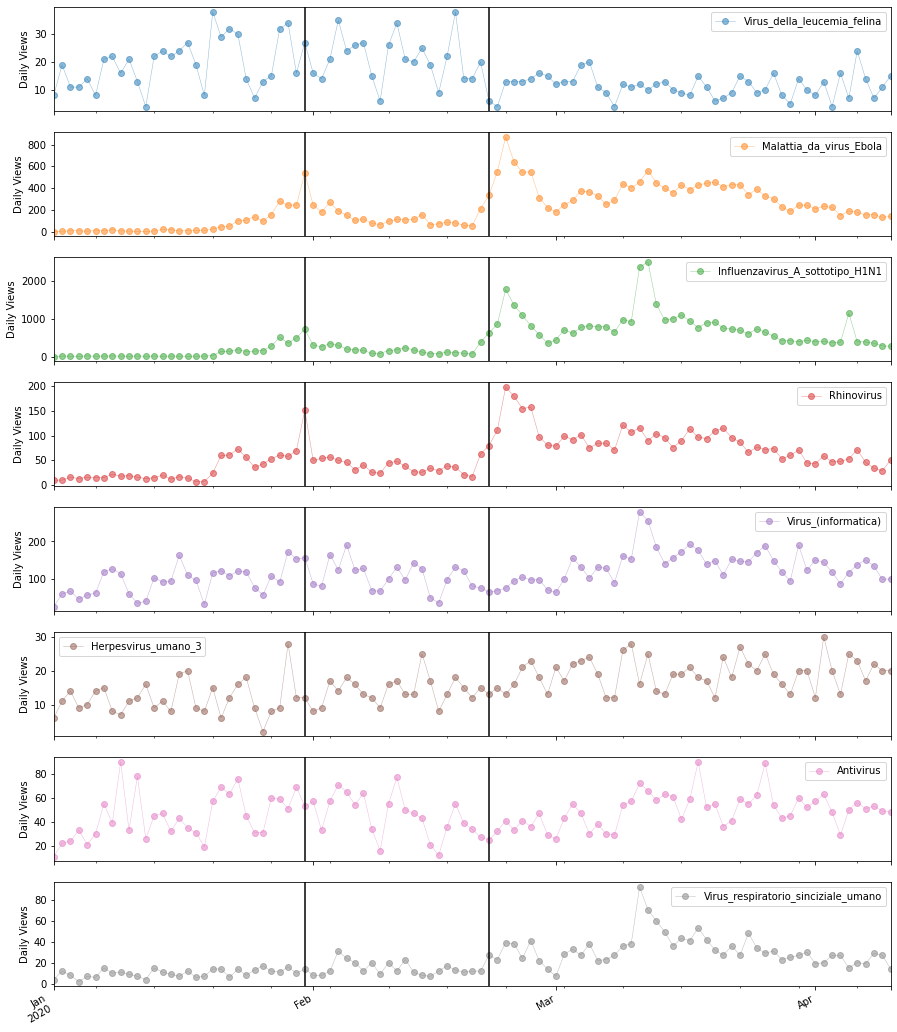

In [12]:
#Plot of time serie pageviews per article beatween date_1(january 2020) and date_2(April 2020)
date_1 = '2020-01-01'
date_2 = '2020-04-10'
axes = Pageviews_virus[date_1 : date_2].plot( marker = 'o', alpha = 0.5, linestyle = '-', figsize=(15, 20),\
                                             subplots=True,linewidth = 0.5)
for ax in axes:
        ax.set_ylabel('Daily Views')
        ax.axvline('2020-01-31', 0, 1, color='k')
        ax.axvline('2020-02-22', 0, 1, color='k')

**On these separated plots, we observe:**

- A peak at date 2020-01-31 (fisrt vertical line) for the articles: <ins>Malattia_da_virus_Ebola</ins>, <ins>Influenzavirus_A_sottotipo_H1N1</ins> and <ins>Rhinovirus</ins>.
- At date 2020-02-22 (second vertical line), the confirmation of an increasing curve for the articles: <ins>Malattia_da_virus_Ebola</ins>, <ins>Influenzavirus_A_sottotipo_H1N1</ins> and <ins>Rhinovirus</ins>, probably explained by the multiple cases confirmations that occured at that time.

In [13]:
#We define a function that returns a DataFrame containing the average values over D days of the original DataFrame given in argument.
def D_days_average(data, D):
    return data.groupby(pd.Grouper(freq= D)).mean()

#We define a function that plots separatly all columns values of a DataFrame versus its index values, all on a single plot.
def data_columns_plot(data, y_label_name, title_name, alpha, \
                      markersize, x_scale, y_scale, figsize, highlight):

    """
    Void function that plots each columns of a DataFrame in a single plot.
    
    :param data: DataFrame that we want to visualize
    :type data: DataFrame
    
    :param y_label_name: Name of each label (column) that we visualize
    :type y_label_name: string
    
    :param title_name: Title of the visualization
    :type title_name: string
    
    :param alpha: Opacity of the lines in the plot
    :type alpha: float64
    
    :param markersize: Size of the markers used
    :type markersize: float64

    :param x_scale: To specify which scale to use on the x axis
    :type x_scale: string
    
    :param x_scale: To specify which scale to use on the y axis
    :type x_scale: string
    
    :param figsize: Size of the plot 
    :type figsize: string
    
    :param highlight: Decide to highlight or not the 2 dates: '2020-01-31' and '2020-02-22,\
                      using vertical lines in the plot
    :type highlight: boolean
    
    """
    fig, a = plt.subplots(figsize= figsize)
    for article in data.columns:
        a.plot(data[article],label=article, marker = 'o', alpha = alpha, linestyle = '-', markersize= markersize)
        a.set_yscale(y_scale)
        if(x_scale != 'linear'): 
            a.set_xscale(x_scale)
        if(highlight):
            a.axvline('2020-01-31', 0, 1, color='k')
            a.axvline('2020-02-22', 0, 1, color='k')
        a.legend(loc=2)
        a.set_ylabel(y_label_name)
        a.set_xlabel(data.index.name)
        a.set_title(title_name);
    

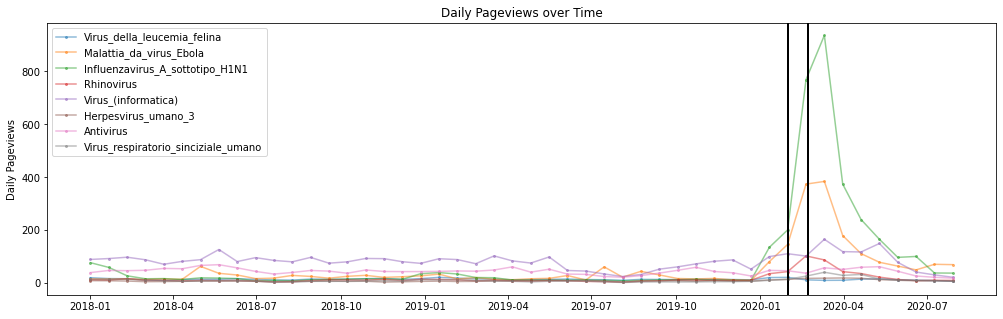

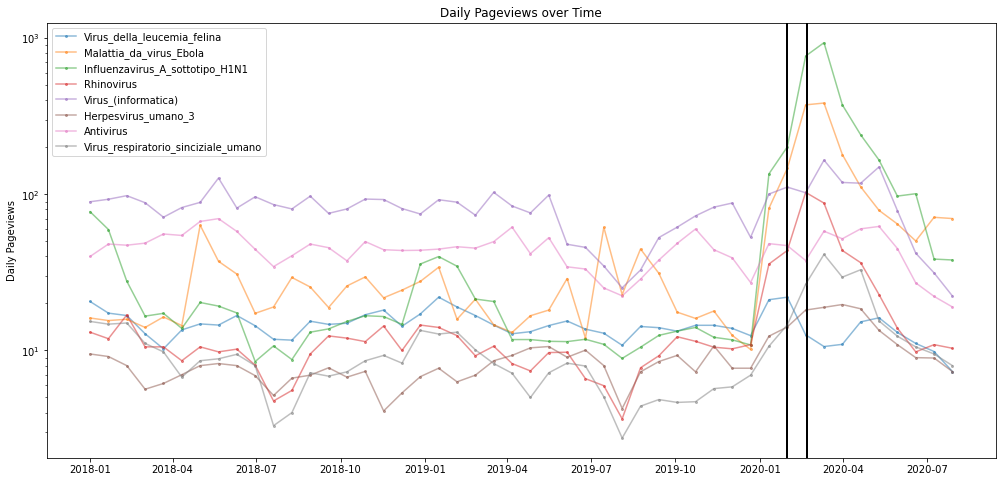

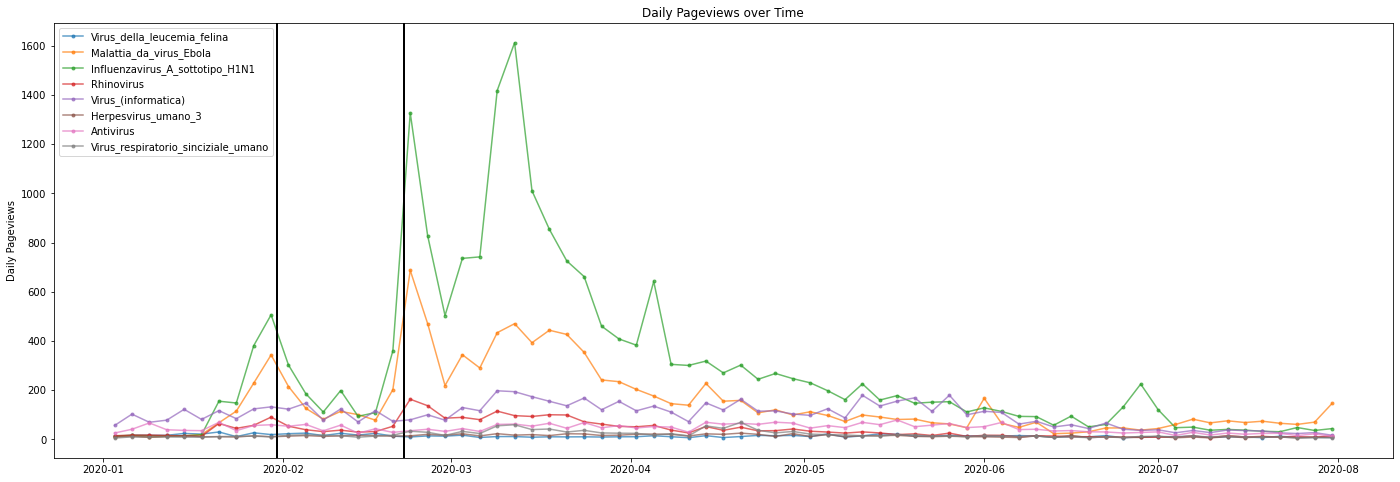

In [14]:
#In order to get the least noise possible and obtain a clearer trend for the visualizations, we will represent only the average pageviews for each articles over a period of 20 days
smooth_pageviews_virus = D_days_average(Pageviews_virus, '20D')
#Linear scale plot
data_columns_plot(smooth_pageviews_virus,'Daily Pageviews', 'Daily Pageviews over Time', 0.5, 2,'linear', 'linear',(17,5),True)
#Logarithmic scale plot
data_columns_plot(smooth_pageviews_virus,'Daily Pageviews', 'Daily Pageviews over Time', 0.5, 2,'linear', 'log',(17,8),True)
#We take the mean of 3 days pageviews for each point and plot them between 2020-01 and 2020-10 also to obtain a clearer trend
Pageviews_2020 = D_days_average(Pageviews_virus, '3D').loc['2020-01':'2020-10']
#Linear scale plot
data_columns_plot(Pageviews_2020, 'Daily Pageviews', 'Daily Pageviews over Time', 0.7, 3,'linear', 'Linear', (24,8),True)



### ~ 3.2.3

##### We first ploted (first plot above) the daily pageviews of all articles over the <ins>whole period</ins>, using a <ins>linear</ins> scale. We observe that:
 - The article 'Influenzavirus_A_sottotipo_H1N1' exploded after the 31th of January 2020 (**first vertical line on the plot**) compared to the other articles
 - Other articles like 'Malattia_da_virus_Ebola' , 'Virus_(informatica)' and 'Rhinovirus' also draw a significant increase after the 31th of January 2020 (**first vertical line on the plot**).
 
##### We then ploted (second plot above) the daily pageviews of all articles over the <ins>whole period</ins>, using a <ins>logarithmic</ins> scale, to see more clearly the trends of the different curves. We observe that:
- Globally, all article pageviews increase at the beginning of the year 2020 excepted for the two articles: 'Virus_della_leucemia_felina' and 'Antivirus'.

##### After plotting the daily pageviews of all articles over the whole period, we decided to focus more on the <ins>2020 period</ins> of time (third plot above). Using this point of view, we observe that:
- There is a pic appearing around 2020-01-31 (**first vertical line on the plot**), afterwhat the overall pageviews decreasing before reincreasing again around the date: 2020-02-22 (**second vertical line on the plot**); which is explained by the multiple cases confirmations that occured at that time.



### **Task 3.3**

Before we move on, let's make a final sanity check and analyze the distribution of pageviews over all articles in our dataset. You are given a function to calculate the **cumulative distribution function** (CDF) of a sample. The CDF is a function f(x) associated with a data sample. For each value x, f(x) represents the percentage of elements in your sample that have values smaller or equal to x (read more about it [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).
Your task is to:

1. Calculate the CDF of the distribution of pageviews across all days over articles. That is, a) calculate the total number of pageviews each article has received and then, b) calculate the CDF for these values.


2. Now plot this function using different scales for the x- and y-axis. You should plot it in 4 different ways:

    a. x-axis on linear scale, y-axis on linear scale
    
    b. x-axis on log scale, y-axis on linear scale
    
    c. x-axis on linear scale, y-axis on log scale
    
    d. x-axis on log scale, y-axis on log scale
    
3. **Discuss:** There is a pretty odd fact about the distribution of our data! Can you spot it and describe it? Which of the different plots (a-d) allows you to find this oddity? Why isn't this visible in the other plots?

---

**Hint:** You can use `plt.xscale` and `plt.yscale`.

### ~ 3.3.1

5


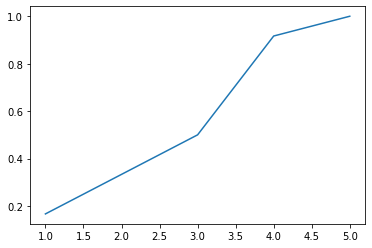

In [15]:
# This function is being given to you with a usage example :)! Make good use!

import numpy as np

def get_cdf(vals):
    # Input:
    # -- vals: an np.array of positive integers
    # Output:
    # -- x: an array containing all numbers from 1 to max(vals);
    # -- y: an array containing the (empirically calculated) probability that vals <= x
    
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    y = y
    x = list(range(1, max(vals) + 1))
    return x, y  

vals = np.array([1,2,3,4,1,2,4,3,4,4,5,4])
x, y = get_cdf(vals)

plt.plot(x, y)
print(len(y))
plt.show()

### Understaing and building CDF

Since we can not make a plot out of all of the data, we decide to sample only part of the data (at a regular space of 5000). The articles are sorted by PV and we would like to see how they are distributed.

**Does a small of articles get all the PV or are they shared pretty equally ?**

In [16]:
Total_Pageviews_per_article = pd.DataFrame(articles.agg('sum' , axis=1), columns=['PageViews_per_Article']).sort_values('PageViews_per_Article')
Total_Pageviews_per_article['x_value'] = np.arange( 1, len(Total_Pageviews_per_article)+1)
Total_Pageviews_per_article = Total_Pageviews_per_article.iloc[[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000]]
Total_Pageviews_per_article

,PageViews_per_Article,x_value
index,,
Ariondassa,291,1
Charles_Belgique_Hollande_de_La_Trémoille,365,5001
Vayechi,463,10001
Fichtelgebirge,596,15001
Cattedrale_di_Notre-Dame_(Bangui),788,20001
Ospedale_Santissimo_Gonfalone,1047,25001
Castello_di_Villasor,1425,30001
Statistiche_e_record_di_David_Ferrer,2017,35001
Latimeria_chalumnae,3055,40001


In [17]:
dist = np.ones(Total_Pageviews_per_article.PageViews_per_Article[0])
for i in range(1,len(Total_Pageviews_per_article)):
    dist= np.concatenate((dist, np.ones(Total_Pageviews_per_article.PageViews_per_Article[i])*Total_Pageviews_per_article.x_value[i]))
dist = dist.astype(int)



In [18]:
Distribution_x, Distribution_y = get_cdf(dist)
Distribution = pd.DataFrame(Distribution_y, columns=['CDF'])
Distribution.index.name = 'x'
Distribution

,CDF
x,
0,0.003438
1,0.003438
2,0.003438
3,0.003438
4,0.003438
...,...
54996,0.306664
54997,0.306664
54998,0.306664


### ~ 3.3.2

We know plot the CDF usin linear and logarithmic axis.

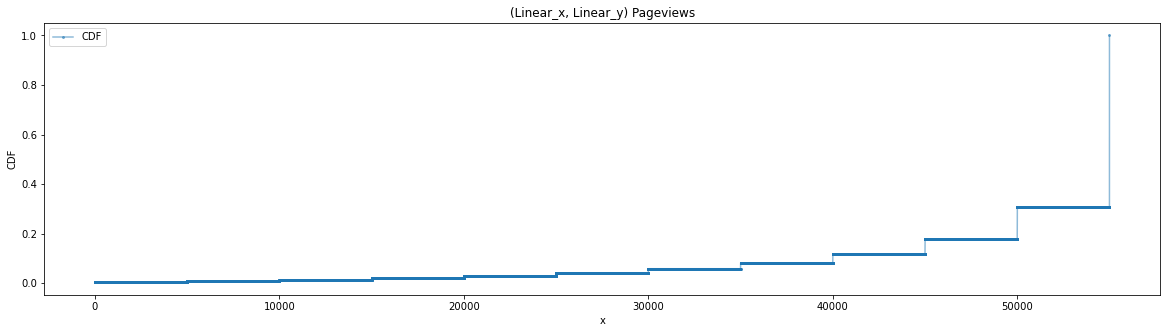

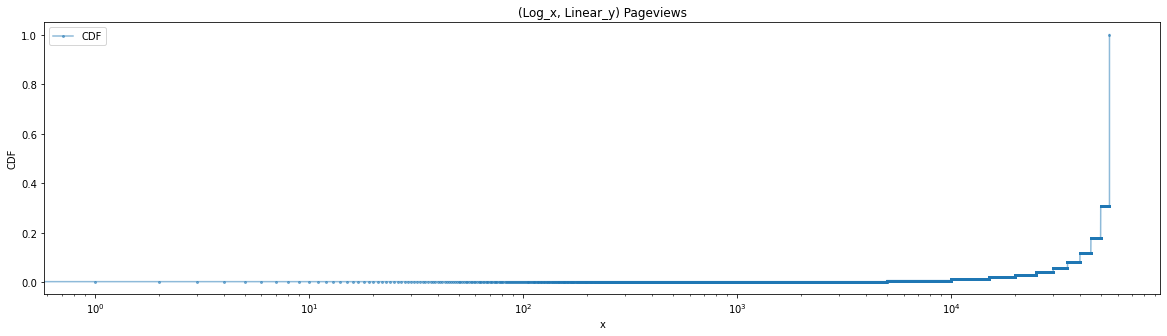

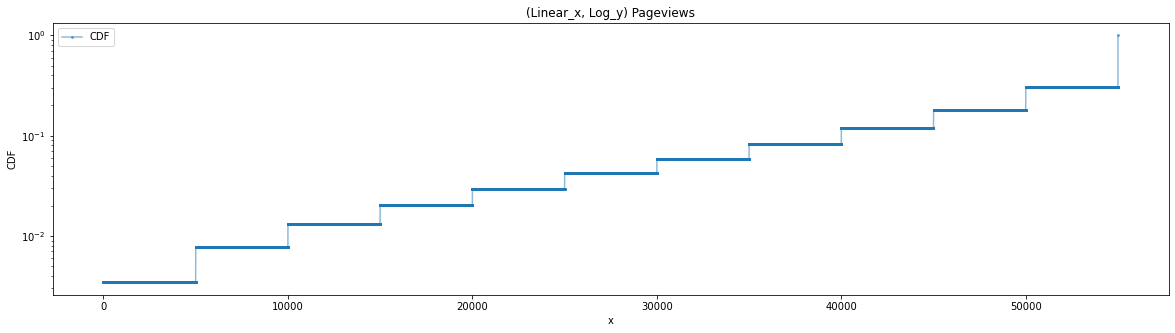

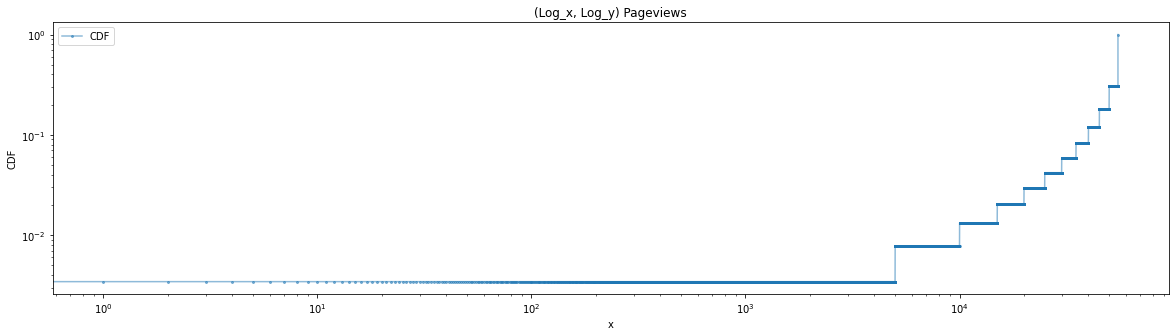

In [19]:
data_columns_plot(Distribution,'CDF', '(Linear_x, Linear_y) Pageviews', 0.5, 2, 'linear','linear',(20,5), False)
data_columns_plot(Distribution,'CDF', '(Log_x, Linear_y) Pageviews', 0.5, 2, 'log','linear',(20,5), False)
data_columns_plot(Distribution,'CDF', '(Linear_x, Log_y) Pageviews', 0.5, 2, 'linear','log',(20,5), False)
data_columns_plot(Distribution,'CDF', '(Log_x, Log_y) Pageviews', 0.5, 2, 'log','log',(20,5), False)


### ~ 3.3.3
#### INTERPRETATION: 

It is odd and interisting to note that the distribution of PageViews has a 'exponantional shape'. The linear_x, log_y plot is quite linear which shows that the PV are distributed exponantionally. 

That means that only a small amount of articles get most of the trafic.

However, the low sampling does 

## *Step 4*: Analyzing Overall Pageview Volume


---
### **Task 4.1**

So far we have seen anecdotal examples. Now let’s move to the big picture! How did Wikipedia pageviews change in general? To gain a better understanding of how Wikipedia’s overall pageview volume has changed during the pandemic, you should do the following:

1. Calculate and visualize the pageviews trends across summed across **all** articles in Italian Wikipedia for the year 2020. (and only for 2020!). 
2. **Discuss**: what regular pattern (something that repeats over and over) do you see in the data?
3. Pre-process the data to remove this regular pattern and make the overall trend clearer. Repeat the plot with the processed data.

---

**Hint**: A convenient way to use `.groupby` alongside dates is to use the [`pd.Grouper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) class. Basically, it allows you to group by date periods given frequencies determined by the parameter `freq`. To read how to specify different types of frequencies, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Recall that, in order to turn an index, column index -- or pretty much anything -- into a timestamp, you can use  [`pd.to_timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_timestamp.html).

### ~ 4.1.1

We gather the informations from articles and sum the pageviews for all article. We reshape the data and convert to the time_date convention. We then plot for the year 2020 giving us a large plot.

Text(0.5, 1.0, 'Pageviews Trends across articles from italian wikipedia for The Year 2020')

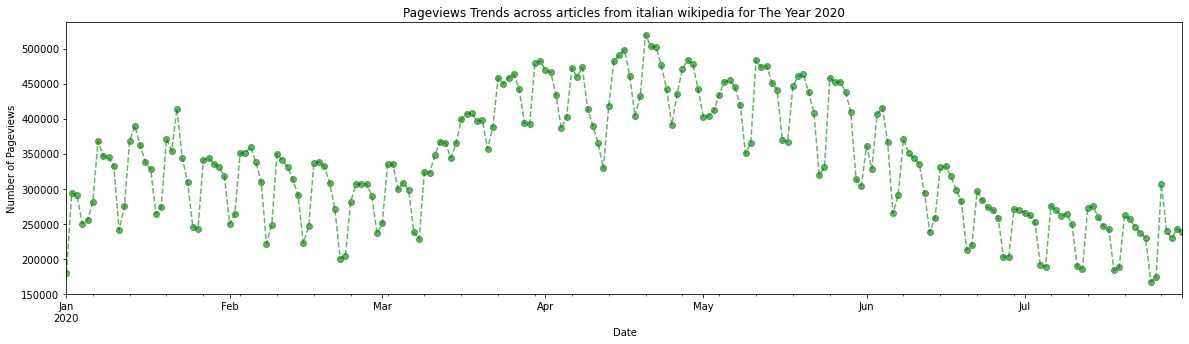

In [20]:
### ~ 4.1.1
### Your code here! ###


#converting the articles dataframe to a time serie
articles_T = articles.T
articles_T.index = pd.to_datetime(articles_T.index)
articles_time_serie = articles_T.sum(axis=1)

#Plotting the time serie from January to latest data
ax = articles_time_serie['2020-01' : ].plot(alpha = 0.6 , linestyle ='--' , marker ='o' , figsize = (20,5), color='g')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Pageviews')
ax.set_title('Pageviews Trends across articles from italian wikipedia for The Year 2020')

### ~ 4.1.2
- We observe weekly oscillations across the time. If we look closer we can see that the oscillations are due to high values of page views in average during weekdays and low values of pageviews during week ends. 
- The populations use wikipedia significantly more during workdays.

### ~ 4.1.3


##### We re-process the data by removing the regular pattern and make the overall trend clearer. To do so, we resample the data by applying the mean over each week :

In [21]:
articles_time_daily = articles_time_serie.to_frame(name='Pageviews')
articles_time_weekly_mean = articles_time_daily['2020-01' : ].resample('W').mean()
articles_time_weekly_mean.head(3)

,Pageviews
2020-01-05,253873.600000
2020-01-12,312617.285714
2020-01-19,331803.714286


Text(0.5, 1.0, 'Weekly mean resample of Pageviews Trends Across All Articles in Italian Wikipedia for The Year 2020')

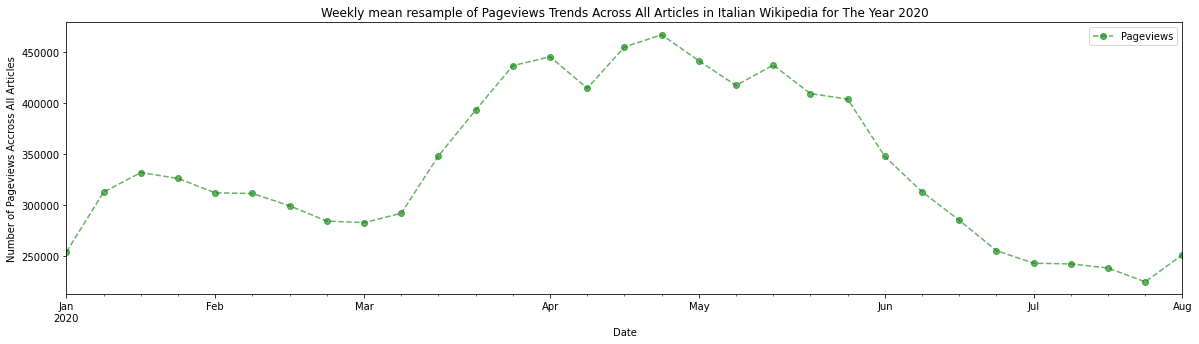

In [22]:
#Plotting the data for the "mean resampling" method
ax = articles_time_weekly_mean['2020-01' : ].plot(alpha = 0.6 , linestyle ='--' , marker ='o' , figsize = (20,5), color='g')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Pageviews Accross All Articles')
ax.set_title('Weekly mean resample of Pageviews Trends Across All Articles in Italian Wikipedia for The Year 2020')

### **Task 4.2**

To get an even clearer picture, your task now is to compare the pageview time series of the current year (2020) with the time series of the previous year (2019).

1. Make a visualization where the two years are somehow "aligned", that is, where it is possible to compare the same time of year across the two years. Additionally, your visualization should highlight the date on which the nationwide lockdown started in Italy, 9 March 2020. Preprocess each one of the time series (for each year) the same way you did in Task 4.1.

3. **Discuss:** What changed from 2019 to 2020? Form and justify hypotheses about  the reasons behind this change.

---

**Hint**: In order to use two different y-axes in the same plot, you can use plt.twiny() or ax.twinx() (the latter if you are using the subplots environment;  [See this example](https://matplotlib.org/3.3.1/gallery/subplots_axes_and_figures/two_scales.html)).

### ~ 4.2.1


In [23]:
#We creat a dataframe for each year's time series
articles_2020=articles_time_serie['2020'].to_frame(name='Pageviews 2020')
articles_2019 =articles_time_serie['2019'].to_frame(name='Pageviews 2019')

#We pre-process the data, resampling the data weekly with the mean method.
articles_2020_mean = articles_2020.resample('W').mean()
articles_2019_mean = articles_2019.resample('W').mean()

articles_2020

,Pageviews 2020
2020-01-01,179885
2020-01-02,294016
2020-01-03,290670
2020-01-04,250035
2020-01-05,254762
...,...
2020-07-27,306029
2020-07-28,239158
2020-07-29,229465
2020-07-30,242640


In [24]:
#We reformate the data frames
articles_2020_mean=articles_2020_mean.reset_index().rename(columns={"index": "Week Date"})
articles_2019_mean=articles_2019_mean.reset_index().rename(columns={"index": "Week Date"})

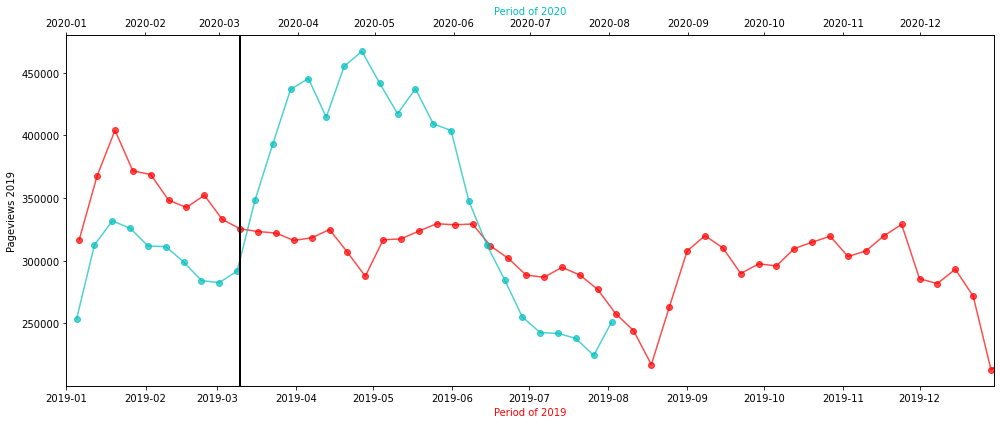

In [25]:
from matplotlib.dates import date2num
from datetime import datetime
#We plot each year's graph in the same plot.
fig, ax1 = plt.subplots(figsize=(14,6))

color = 'r'
ax1.set_xlabel('Period of 2019', color=color)
ax1.set_ylabel('Pageviews 2019')
ax1.plot(articles_2019_mean['Week Date'], articles_2019_mean['Pageviews 2019'], marker = 'o', alpha = 0.7, linestyle = '-', markersize= 6,  color=color)
ax1.set_xlim(date2num(datetime(2019,1,1)),date2num(datetime(2019,12,30)))


ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis

color = 'c'
ax2.set_xlabel('Period of 2020', color=color)  # we already handled the x-label with ax1
ax2.plot(articles_2020_mean['Week Date'], articles_2020_mean['Pageviews 2020'],  marker = 'o', alpha = 0.7, linestyle = '-', markersize= 6,  color=color)
ax2.set_xlim(date2num(datetime(2020,1,1)),date2num(datetime(2020,12,30)))


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.axvline(date2num(datetime(2020,3,9)), label="2020 Italian Lockdown", color="k",linewidth = 2)

Expliquer le graph de dessus

### ~ 4.2.2

We clearly observe an augmentation of traffic in the italian wikipidea from our data sample. The augmentation start with the nationwide lockdown in Italy the 9th of March 2020 (**Balck vertical line on the plot**). 
A high value of page views is maintained untill the end of the lock down with a fall in traffic equivalent to a long holiday for a normal year. Indeed, people where released from a long period confined in their homes and enjoying outdoor activities respecting more or less the sanitary recoomendation of the WHO.

## *Step 5*: Fiddling with Topics

---
### **Task 5.1**

We now turn to a different question: what topics were impacted by the lockdown? 
To start unpacking this question, your task now is to aggregate, for each day, all pageviews that went to each one of the 64 topics. 

There are multiple ways to do this, but for the sake of this exercise, you must create a dataframe where each row contains the number of pageviews a topic obtained on a given day! Example:

~~~
index       date                   views             
TOPIC1      2019-01-01             101              
TOPIC1      2019-01-02             151             
(...)       (...)                  (...)
TOPICK      2019-01-01             1010              
TOPICK      2019-01-02             2123            
(...)       (...)                  (...)
~~~

---

**Hint**: You've should find a way to make the index in the dataframe with the topics be the same as the index in the dataframes with the articles. See the file `mapping.pickle`.

**Hint**: You may want to use `.melt`.

## 5.1 What topics were impacted by Covid ?

### First step : translating
We start by translating the articles in english. Indeed, the topics data is given for article names in english while our data is in italian.

Thus, we merge the 'mapping' DataFrame in our 'article' DataFrame. The key chosen for the merge is the italian name. the `merge` function will automatically find the correspondance and add a column with the english name.

However, we encounter an issue. Not all of italian articles have a translation in english. We choose to make an inner join. Hence, we drop a significative part of our data but we need to do so if we want to include them in topics later.

In [26]:
if(len(articles) != len(mapping)):
    print('Articles has a lenght of {} while mapping has a lenth of {}'.format(len(articles),len(mapping)))

articles.index.name = 'Italian_Name'
articles.head()
articles_with_2titles = pd.merge(mapping, articles , left_on='Italian_Name', right_index=True, how = 'inner')
articles_with_2titles

Articles has a lenght of 55791 while mapping has a lenth of 35611


,Italian_Name,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
English_Name,,,,,,,,,,,,,,,,,,,,,
Chinese_food_therapy,Dietetica_cinese,0,1,5,2,1,7,15,8,8,...,0,0,6,0,2,0,1,1,0,0
Battle_of_Naissus,Battaglia_di_Naisso,4,4,1,0,3,10,2,4,5,...,1,3,0,0,2,3,2,3,1,2
Battle_of_Stoke_Field,Battaglia_di_Stoke_Field,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
Smooth_newt,Lissotriton_vulgaris,1,2,0,1,4,2,4,2,5,...,6,3,2,1,5,3,0,0,1,6
Vicente_Aleixandre,Vicente_Aleixandre,0,6,9,2,1,1,3,1,4,...,1,1,4,1,2,5,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Banca_Akros,Banca_Akros,3,3,4,4,8,3,3,10,4,...,1,3,5,2,4,7,9,2,3,2
Arms_Around_You,Arms_Around_You,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,2,1
Gioventù_bruciata,Gioventù_bruciata_(album_Mahmood),0,0,0,0,0,0,0,0,0,...,14,9,10,13,17,25,17,9,19,15


### Second step : Duplicating the index

Our goal is to melt the Dataframe Articles. We want the dates to appear in a 'long-mode' instead of a wide one. 

Before doing so, we need to duplicate English_Name as a column (instead of an index) in order to be able to use it as an identification variable in the melt function. We thus duplicated it.

In [27]:
articles_with_2titles['English_col'] = articles_with_2titles.index
articles_with_2titles.rename_axis('index')
articles_with_2titles.reset_index()
articles_with_2titles

,Italian_Name,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,2018-01-09 00:00:00,...,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00,English_col
English_Name,,,,,,,,,,,,,,,,,,,,,
Chinese_food_therapy,Dietetica_cinese,0,1,5,2,1,7,15,8,8,...,0,6,0,2,0,1,1,0,0,Chinese_food_therapy
Battle_of_Naissus,Battaglia_di_Naisso,4,4,1,0,3,10,2,4,5,...,3,0,0,2,3,2,3,1,2,Battle_of_Naissus
Battle_of_Stoke_Field,Battaglia_di_Stoke_Field,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,Battle_of_Stoke_Field
Smooth_newt,Lissotriton_vulgaris,1,2,0,1,4,2,4,2,5,...,3,2,1,5,3,0,0,1,6,Smooth_newt
Vicente_Aleixandre,Vicente_Aleixandre,0,6,9,2,1,1,3,1,4,...,1,4,1,2,5,3,2,0,0,Vicente_Aleixandre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Banca_Akros,Banca_Akros,3,3,4,4,8,3,3,10,4,...,3,5,2,4,7,9,2,3,2,Banca_Akros
Arms_Around_You,Arms_Around_You,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,1,Arms_Around_You
Gioventù_bruciata,Gioventù_bruciata_(album_Mahmood),0,0,0,0,0,0,0,0,0,...,9,10,13,17,25,17,9,19,15,Gioventù_bruciata


### Third step : Re-organising Topics

The topics are linked to the wiki pages in an unconventional way that we can not directly work with. We need to reformat it first.

It is currently presented as a table of booleans with pages as rows and topics as columns. We would like to have a mapping DataFrame where each topic has its pages associated. The difficulty is that a wiki page can be in several topics.

**Note**: Topics are sometimes referred to as 'categories'.

Since categories are non-unique (for a movie), we transpose the boolean table. Then, we melt it to obtain a more intersting table. Each row is a couple 'Category-Page'. The value True or False indicates if this couple actually exists on wikipedia.

Finally, we drop all non-True rows. We have the table of every topic associated with its corresponding articles which is way more convinient to work with !

In [28]:
topics_transposed = topics.T
topics_transposed

index,Chinese_food_therapy,Battle_of_Naissus,Battle_of_Stoke_Field,Smooth_newt,Vicente_Aleixandre,Piast_dynasty,Antenor,"Cranford,_New_Jersey","New_Castle,_Indiana",Bugsy,...,Bartender_(James_Blunt_song),Verona_(song),Emanuele_Bombini,Jurassic_World:_The_Game,Giuseppe_Palmieri_(economist),Banca_Akros,Arms_Around_You,Gioventù_bruciata,Power_Rangers:_Battle_for_the_Grid,6th_Pioneer_Regiment_(Italy)
Geography.Regions.Asia.Central Asia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Geography.Regions.Europe.Eastern Europe,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
History and Society.Military and warfare,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
Culture.Media.Television,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
History and Society.Education,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Geography.Regions.Asia.Southeast Asia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Culture.Media.Entertainment,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Culture.Media.Music,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,True,True,False,False
Geography.Regions.Asia.Asia*,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
topics_transposed['Topics'] = topics_transposed.index

topics_melted = topics_transposed.melt(id_vars='Topics')
topics_melted

,Topics,index,value
0,Geography.Regions.Asia.Central Asia,Chinese_food_therapy,False
1,Geography.Regions.Europe.Eastern Europe,Chinese_food_therapy,False
2,History and Society.Military and warfare,Chinese_food_therapy,False
3,Culture.Media.Television,Chinese_food_therapy,False
4,History and Society.Education,Chinese_food_therapy,False
...,...,...,...
2279099,Geography.Regions.Asia.Southeast Asia,6th_Pioneer_Regiment_(Italy),False
2279100,Culture.Media.Entertainment,6th_Pioneer_Regiment_(Italy),False
2279101,Culture.Media.Music,6th_Pioneer_Regiment_(Italy),False
2279102,Geography.Regions.Asia.Asia*,6th_Pioneer_Regiment_(Italy),False


In [30]:
topics_melted = topics_melted[topics_melted.value]

topics_melted

,Topics,index,value
10,STEM.STEM*,Chinese_food_therapy,True
27,Geography.Regions.Asia.East Asia,Chinese_food_therapy,True
30,Culture.Food and drink,Chinese_food_therapy,True
62,Geography.Regions.Asia.Asia*,Chinese_food_therapy,True
66,History and Society.Military and warfare,Battle_of_Naissus,True
...,...,...,...
2279001,Culture.Internet culture,Power_Rangers:_Battle_for_the_Grid,True
2279018,Culture.Media.Media*,Power_Rangers:_Battle_for_the_Grid,True
2279034,Culture.Media.Video games,Power_Rangers:_Battle_for_the_Grid,True
2279042,History and Society.Military and warfare,6th_Pioneer_Regiment_(Italy),True


In [31]:
topics_melted = topics_melted.rename(columns = { 'index': 'English_Name'}, inplace = False)

topics_melted = topics_melted.sort_values('Topics')
topics_melted

,Topics,English_Name,value
1681646,Culture.Biography.Biography*,Albert_of_Genoa,True
2171566,Culture.Biography.Biography*,Elephantis,True
512110,Culture.Biography.Biography*,Christine_Maggiore,True
1701678,Culture.Biography.Biography*,Flavio_Roma,True
1431406,Culture.Biography.Biography*,Alexandre_Renard,True
...,...,...,...
1518040,STEM.Technology,Pipe_wrench,True
169176,STEM.Technology,Yahoo!_Toolbar,True
853592,STEM.Technology,BD-J,True
167384,STEM.Technology,Chromium(IV)_oxide,True


### Fourth Step : merging Articles and Topics

In order to include the category (i.e. topic) information in the Articles DataFrame, we must merge them using the english name as the key.

In [32]:
wiki_merged = pd.merge(topics_melted, articles_with_2titles, left_on = 'English_Name', right_on ='English_col')
wiki_merged = wiki_merged.sort_values('Topics')
wiki_merged = wiki_merged.drop(columns=['value', 'Italian_Name', 'English_col'])
wiki_merged

,Topics,English_Name,2018-01-01 00:00:00,2018-01-02 00:00:00,2018-01-03 00:00:00,2018-01-04 00:00:00,2018-01-05 00:00:00,2018-01-06 00:00:00,2018-01-07 00:00:00,2018-01-08 00:00:00,...,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,Culture.Biography.Biography*,Albert_of_Genoa,0,1,2,0,0,0,1,2,...,1,2,0,0,0,1,1,2,1,0
19742,Culture.Biography.Biography*,Manny_Albam,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
19745,Culture.Biography.Biography*,Hugo_Meisl,0,2,3,1,7,1,5,3,...,1,1,0,1,6,3,0,0,1,2
19749,Culture.Biography.Biography*,Massimilian_Porcello,0,0,0,1,0,0,2,1,...,0,0,0,0,0,0,1,0,1,1
19753,Culture.Biography.Biography*,Davide_Fontolan,2,14,16,12,19,7,5,22,...,9,13,5,5,6,9,5,12,8,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61013,STEM.Technology,GNU_Compiler_Collection,6,8,16,13,13,9,13,16,...,16,16,6,8,9,10,6,12,14,7
61096,STEM.Technology,TvOS,1,4,0,4,3,5,3,6,...,3,3,4,5,5,5,4,3,6,4
61147,STEM.Technology,MXML,0,1,0,0,1,0,1,2,...,0,0,1,0,0,0,1,0,1,0
60684,STEM.Technology,Multimedia_Home_Platform,5,5,8,6,2,7,10,4,...,4,1,2,2,2,3,1,4,3,2


### Fifth step : Melting Articles

In order to put the article in 'long-mode', we use the melt function. Topics and english names ar the identification variable. Dates are the variable and the value is the PageViews (PV).

We obtain a DataFrame containing for every unique article-topic-date combination, the value of PageViews.

In [33]:
wiki_long = wiki_merged.melt(id_vars=['Topics','English_Name'],var_name='Date', value_name='PV')
wiki_long

,Topics,English_Name,Date,PV
0,Culture.Biography.Biography*,Albert_of_Genoa,2018-01-01 00:00:00,0
1,Culture.Biography.Biography*,Manny_Albam,2018-01-01 00:00:00,0
2,Culture.Biography.Biography*,Hugo_Meisl,2018-01-01 00:00:00,0
3,Culture.Biography.Biography*,Massimilian_Porcello,2018-01-01 00:00:00,0
4,Culture.Biography.Biography*,Davide_Fontolan,2018-01-01 00:00:00,2
...,...,...,...,...
96481154,STEM.Technology,GNU_Compiler_Collection,2020-07-31 00:00:00,7
96481155,STEM.Technology,TvOS,2020-07-31 00:00:00,4
96481156,STEM.Technology,MXML,2020-07-31 00:00:00,0
96481157,STEM.Technology,Multimedia_Home_Platform,2020-07-31 00:00:00,2


### Sixth step : split-apply-combine

The article is an information which is not relevant to us. We group by couple 'category-date'. In each of this section, we can sum over the different articles to give us the total pageview per category and per day.

The targeted DataFrame presentation is obtained and the data seems coherent. A double-index is generated.

In [34]:
#We group by Category and Date and then we aggregate by summing
wiki_grouped_by_cat = wiki_long.groupby([wiki_long.Topics , wiki_long.Date])
wiki_sum_cat = wiki_grouped_by_cat.agg('sum')


In [35]:
wiki_sum_cat

PV
Topics                       Date                      
Culture.Biography.Biography* 2018-01-01 00:00:00  58085
                             2018-01-02 00:00:00  86933
                             2018-01-03 00:00:00  88693
                             2018-01-04 00:00:00  94648
                             2018-01-05 00:00:00  90808
...                                                 ...
STEM.Technology              2020-07-27 00:00:00  11507
                             2020-07-28 00:00:00  11023
                             2020-07-29 00:00:00  11131
                             2020-07-30 00:00:00  12406
                             2020-07-31 00:00:00  10467

[60352 rows x 1 columns]

### **Task 5.2**

Now to the **grand finale**. We will consider two periods:
- the 35 days before the quarantine started (in the 9th of March); and 
- the 34 days after the quarantined started (including the day of the quarantine itself).

Create a visualization where you can compare, for each topic, the mean **number of views** in the aforementioned periods (that is, before and after the quarantine started). **Although there is a very large number of topics, your visualization should be a compact panel, small enough to fit on an A4 page.**

---

**Hint**: [Hoooray](https://seaborn.pydata.org/examples/index.html).

### First step : extracting informations for the periods

We begin by creating a new table including the Topics pageviews in the two defined periods (i.e. 35 days pre-lockdown and 34 days post-lockdown).

In [36]:
wiki_sum_cat = wiki_sum_cat.unstack(level=-1)
wiki_sum_cat = wiki_sum_cat.T

wiki_sum_cat = wiki_sum_cat.reset_index(level=0, drop=True)
wiki_sum_cat.index = pd.to_datetime(wiki_sum_cat.index)

wiki_sum_cat_1 = wiki_sum_cat['2020-02-02' : '2020-03-08'].mean(axis=0).to_frame(name='period_1')
wiki_sum_cat_2 = wiki_sum_cat['2020-03-09' : '2020-04-11'].mean(axis=0).to_frame(name='period_2')

In [37]:
wiki_final = pd.merge(wiki_sum_cat_1, wiki_sum_cat_2 , left_index= True, right_index=True)

In [38]:
wiki_final

,period_1,period_2
Topics,,
Culture.Biography.Biography*,64374.111111,88034.823529
Culture.Biography.Women,12567.694444,17370.088235
Culture.Food and drink,3192.166667,4323.441176
Culture.Internet culture,8229.500000,15917.264706
Culture.Linguistics,2910.638889,3920.970588
...,...,...
STEM.Medicine & Health,12378.472222,17230.794118
STEM.Physics,5273.750000,7917.441176
STEM.STEM*,57209.861111,82243.147059


### Second step : Melt & Sort before plot

To prepare for the plot, we have to melt the table above in order to have a 'simpler' version of it. It is now in an a long format. We used Topics as the id_var, the value is the pageviews. The melt function let us lay the periods along the table (instead of having is as two different columns).

After that, we sort it by topics. We noticed that period_2 was sometimes preceeding period_1, thus we also sorted by period.

In [39]:
wiki_final = wiki_final.reset_index()
plot_final = wiki_final.melt(id_vars=['Topics'], var_name='Period', value_name = 'Pageviews')
plot_final = plot_final.sort_values(['Topics','Period'])
plot_final = plot_final.reset_index(drop=True)

plot_final

,Topics,Period,Pageviews
0,Culture.Biography.Biography*,period_1,64374.111111
1,Culture.Biography.Biography*,period_2,88034.823529
2,Culture.Biography.Women,period_1,12567.694444
3,Culture.Biography.Women,period_2,17370.088235
4,Culture.Food and drink,period_1,3192.166667
...,...,...,...
123,STEM.STEM*,period_2,82243.147059
124,STEM.Space,period_1,2051.250000
125,STEM.Space,period_2,2988.294118
126,STEM.Technology,period_1,13452.250000


### Third step : plot !

Now that we have the pageviews for each topic for the two time-periods (pre and post lockdown), we can plot them. We use the seaborn library to make a bar-plot. For every topic, the blue bar represents the PV pre-lockdown and the orange one is the page views post-lockdown.

<AxesSubplot:xlabel='Pageviews', ylabel='Topics'>

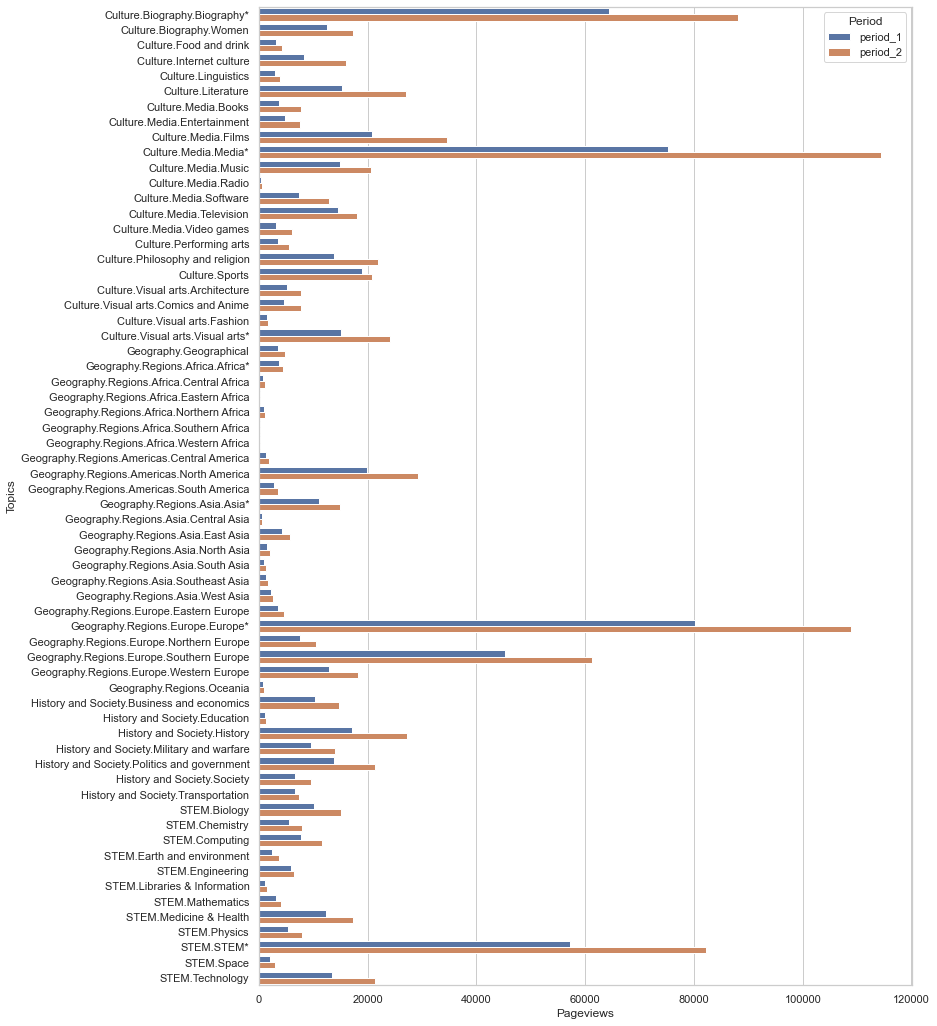

In [40]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,18)})
sns.set(style='whitegrid')
sns.barplot(x='Pageviews' , y='Topics', hue = 'Period', data =plot_final, orient='h')

It is hard to interpret the data since it is not normalized. This leads to the task 5.3

### **Task 5.3**

Notice that the previous analysis fails to isolate the increases or decreases in each individual topic from the overall increases or decreases in pageviews across Wikipedia in general. That is, it could be that all topics gained/lost pageviews, but some did so more than articles in general, while others did so less than articles in general. To address this issue, you should:


1. Normalize the pageviews counts in the dataframe created in Task 5.1. Instead of using the raw number of pageviews, you should compute, for each day, what fraction of all pageviews a topic received.

2. Create a second visualization that shows not the **raw** value of pageviews before and after, but the **relative** value that you just calculated.

3. **Discuss:** According to Task 5.2, what topics have increased in terms of the raw, absolute number of pageviews after the quarantine started? In relative, rather than absolute, terms, do these findings still hold? If not, what has changed?

---

### Normalization

In order to normalize the data, we have to divide every pageview value by the total number of pageview for a given day. In the next table, we can easily obtain the total number of pageviews per day by summing over a row.

Thus, using the 'Apply' function, we can normalize the values. The functions divides each value by the sume of all the values of its row. We verified the process by checking that the sum of the normalized values give us 1 for everyday.

Then, a bit of reshaping let us obtain the targeted table. Period_1 is the pre-lockdown period. Period_2 is post-lockdown.

In [41]:
wiki_sum_cat

Topics,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,Culture.Media.Media*,...,STEM.Computing,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,58085,12370,2093,6441,1606,13606,3538,6761,29534,86210,...,3406,1208,3600,1515,993,5574,2203,28743,1310,7815
2018-01-02,86933,17811,3788,10743,3565,21768,6063,10129,39828,121443,...,7681,2595,6060,2360,2695,13943,5345,60495,2262,15249
2018-01-03,88693,17743,3956,11252,3488,21789,5834,10584,38327,119024,...,7687,2584,6707,2585,3024,13461,5804,63281,2376,16071
2018-01-04,94648,20312,4149,10813,3696,21183,5553,9553,34752,119385,...,8100,2674,6529,2362,3281,13875,6412,66305,2642,16179
2018-01-05,90808,19309,3863,10144,3465,20844,5771,8261,32924,109478,...,7858,2557,6433,2623,3129,12648,5817,61418,2337,15653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,121292,11680,2438,7660,3860,12992,3293,4183,18129,62356,...,6241,1691,4936,845,2376,9149,3652,44887,1446,11507
2020-07-28,59043,11901,2542,7049,2837,12802,3403,3895,18491,62370,...,5969,1528,4834,755,2255,8684,3638,42971,1509,11023
2020-07-29,56121,10841,2336,6988,2361,12373,3348,3791,15722,58605,...,5955,1481,4406,803,2100,8146,3276,41555,1422,11131


In [42]:
wiki_normalized = wiki_sum_cat.apply(lambda x : x/(x.sum(axis=0)), axis=0)

In [43]:
wiki_normalized

Topics,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,Culture.Media.Media*,...,STEM.Computing,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.000813,0.000908,0.000604,0.000754,0.000477,0.000779,0.000847,0.001281,0.001405,0.001113,...,0.000464,0.000470,0.000618,0.001089,0.000337,0.000496,0.000413,0.000506,0.000551,0.000559
2018-01-02,0.001216,0.001307,0.001093,0.001258,0.001059,0.001247,0.001452,0.001919,0.001895,0.001568,...,0.001047,0.001010,0.001040,0.001696,0.000914,0.001240,0.001003,0.001066,0.000952,0.001092
2018-01-03,0.001241,0.001302,0.001142,0.001318,0.001036,0.001248,0.001397,0.002005,0.001823,0.001537,...,0.001048,0.001006,0.001152,0.001858,0.001026,0.001197,0.001089,0.001115,0.001000,0.001151
2018-01-04,0.001324,0.001491,0.001198,0.001266,0.001098,0.001213,0.001330,0.001810,0.001653,0.001541,...,0.001104,0.001041,0.001121,0.001698,0.001113,0.001234,0.001203,0.001168,0.001111,0.001158
2018-01-05,0.001271,0.001417,0.001115,0.001188,0.001029,0.001194,0.001382,0.001565,0.001566,0.001414,...,0.001071,0.000995,0.001105,0.001885,0.001061,0.001125,0.001091,0.001082,0.000983,0.001121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,0.001697,0.000857,0.000704,0.000897,0.001146,0.000744,0.000789,0.000792,0.000862,0.000805,...,0.000851,0.000658,0.000847,0.000607,0.000806,0.000814,0.000685,0.000791,0.000608,0.000824
2020-07-28,0.000826,0.000873,0.000734,0.000825,0.000843,0.000733,0.000815,0.000738,0.000880,0.000805,...,0.000814,0.000595,0.000830,0.000543,0.000765,0.000772,0.000683,0.000757,0.000635,0.000789
2020-07-29,0.000785,0.000796,0.000674,0.000818,0.000701,0.000709,0.000802,0.000718,0.000748,0.000757,...,0.000812,0.000576,0.000756,0.000577,0.000712,0.000725,0.000615,0.000732,0.000598,0.000797


In [44]:
wiki_normalized_1 = wiki_normalized['2020-02-02' : '2020-03-08'].mean(axis=0).to_frame(name='period_1')
wiki_normalized_2 = wiki_normalized['2020-03-09' : '2020-04-11'].mean(axis=0).to_frame(name='period_2')

In [45]:
wiki_normalized_final = pd.merge(wiki_normalized_1, wiki_normalized_2 , left_index= True, right_index=True)

In [46]:
wiki_normalized_final

,period_1,period_2
Topics,,
Culture.Biography.Biography*,0.000901,0.001232
Culture.Biography.Women,0.000922,0.001275
Culture.Food and drink,0.000921,0.001248
Culture.Internet culture,0.000964,0.001864
Culture.Linguistics,0.000864,0.001165
...,...,...
STEM.Medicine & Health,0.001101,0.001533
STEM.Physics,0.000989,0.001485
STEM.STEM*,0.001008,0.001449


In [47]:
import seaborn as sns

wiki_normalized_final = wiki_normalized_final.reset_index()
plot_wiki_normalized = wiki_normalized_final.melt(id_vars=['Topics'], var_name='Period', value_name = 'Pageviews')
plot_wiki_normalized = plot_wiki_normalized.sort_values(['Topics','Period'])
plot_wiki_normalized = plot_wiki_normalized.reset_index(drop=True)
plot_wiki_normalized

,Topics,Period,Pageviews
0,Culture.Biography.Biography*,period_1,0.000901
1,Culture.Biography.Biography*,period_2,0.001232
2,Culture.Biography.Women,period_1,0.000922
3,Culture.Biography.Women,period_2,0.001275
4,Culture.Food and drink,period_1,0.000921
...,...,...,...
123,STEM.STEM*,period_2,0.001449
124,STEM.Space,period_1,0.000863
125,STEM.Space,period_2,0.001257
126,STEM.Technology,period_1,0.000963


### Plot

After this normalization, we can plot the normalized version of the plot done in 5.2. It is now much more interesting since we can compare much more efficiently.

<AxesSubplot:xlabel='Pageviews', ylabel='Topics'>

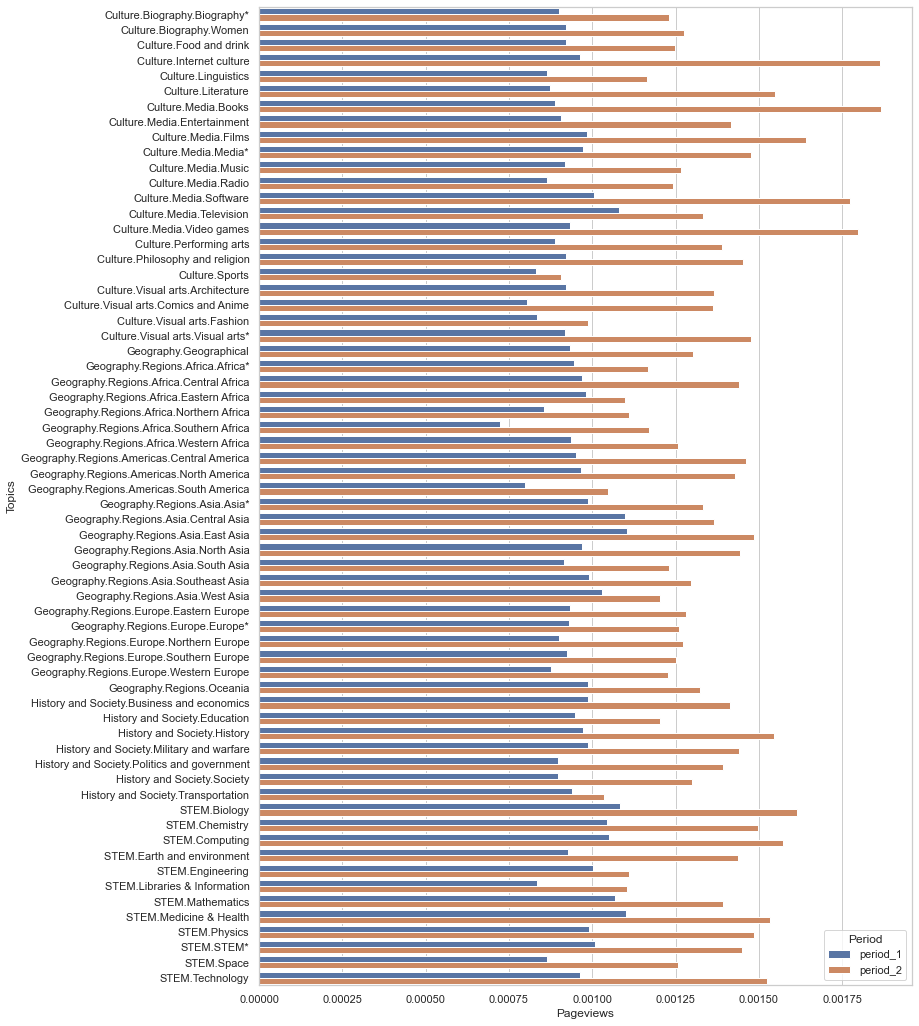

In [48]:
sns.set(rc={'figure.figsize':(11.7,18)})
sns.set(style='whitegrid')
sns.barplot(x='Pageviews' , y='Topics', hue = 'Period', data =plot_wiki_normalized, orient='h')

### Discussion

According to 5.2, it seems that almost all topics increased their PV. However, some did more than others. We can, for example, ehance Culture.Media.Media*, Culture.Biography.Biography* or STEM.STEM*. This analysis is very biased because the evolution of small values is uner-estimated (even if it might be relatively bigger than for bigger values).

In relative, rather than absolute, it seems that most topics increased in a similar way. We could however ehance Culture.Media.Software, Culture.Media.Video Games, Culture.Media.Books or Culture.Internet Culture. We here saw the importance of normalization to interpret data accurately



---